# Explore here

In [28]:
import os

from dotenv import load_dotenv

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [29]:
# Cargar variables del archivo .env
load_dotenv()

# Obtener las credenciales
client_id = os.getenv("CLIENT_ID")
client_secret = os.getenv("CLIENT_SECRET")

In [30]:
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
spotify = spotipy.Spotify(auth_manager=auth_manager)

In [43]:
artist_id = "6qqNVTkY8uBg9cP3Jd7DAH"
artist_name = spotify.artist(artist_id)['name']
top_tracks = spotify.artist_top_tracks(artist_id)['tracks']

df_tracks = pd.DataFrame(top_tracks)
df_tracks = df_tracks[['name', 'popularity', 'duration_ms']]
df_tracks['duration_min'] = df_tracks['duration_ms'] / 60000
df_tracks = df_tracks.drop(columns=['duration_ms'])

In [46]:
df_tracks = df_tracks.sort_values(by='popularity', ascending=False)
display(df_tracks.head(3))

,name,popularity,duration_min
0,BIRDS OF A FEATHER,99,3.506217
1,WILDFLOWER,96,4.357767
2,CHIHIRO,90,5.057333


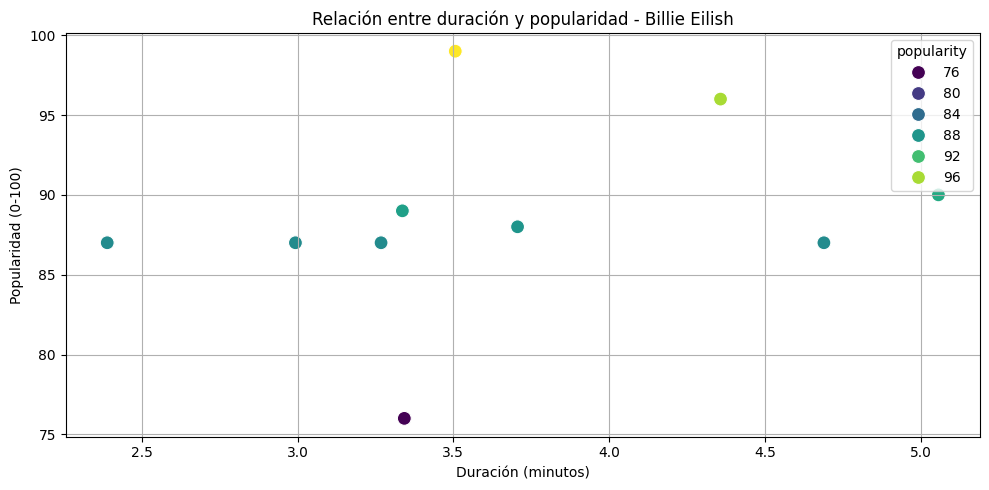

In [47]:
plt.figure(figsize=(10, 5))
sns.scatterplot(
    data=df_tracks, 
    x='duration_min', 
    y='popularity', 
    hue='popularity', 
    palette='viridis', 
    s=100)

plt.title(f'Relación entre duración y popularidad - {artist_name}')
plt.xlabel('Duración (minutos)')
plt.ylabel('Popularidad (0-100)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [48]:
tracks_id = [tracks['id'] for tracks in top_tracks]

features = spotify.audio_features(tracks_id)


HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=6dOtVTDdiauQNBQEDOtlAB,3QaPy1KgI7nu9FJEQUgn6h,7BRD7x5pt8Lqa1eGYC4dzj,0IsIY8pfu1yaGkPUD7pkDx,0u2P5u6lvoDfwTYjAADbn4,6wf7Yu7cxBSPrRlWeSeK0Q,2uIX8YMNjGMD7441kqyyNU,43zdsphuZLzwA9k4DJhU0I,629DixmZGHc7ILtEntuiWE,3GYlZ7tbxLOxe6ewMNVTkw with Params: {} returned 403 due to None


SpotifyException: http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=6dOtVTDdiauQNBQEDOtlAB,3QaPy1KgI7nu9FJEQUgn6h,7BRD7x5pt8Lqa1eGYC4dzj,0IsIY8pfu1yaGkPUD7pkDx,0u2P5u6lvoDfwTYjAADbn4,6wf7Yu7cxBSPrRlWeSeK0Q,2uIX8YMNjGMD7441kqyyNU,43zdsphuZLzwA9k4DJhU0I,629DixmZGHc7ILtEntuiWE,3GYlZ7tbxLOxe6ewMNVTkw:
 None, reason: None

## Quiero realizar la parte de exploración avanzada pero no tengo suficientes permisos para acceder a esta información
### ¿Se debe a mi cuenta de spotify? ¿a que se debe?